# InSAR Time Series Analysis: MintPy + ARIA GUNW products


In this notebook, we will use:
- **`ariadownload.py`** to download all the GUNW products on track 87 over Tabuk area '28.2618 28.5803 35.1965 37.0116' (see Fig. 1) corresponding to all interferograms produced starting 2014 through to the present day.
- **`ariaTSsetup.py`** to extract data layers (unwrapped phase, coherence) and imaging geometry layers (azimuth angle, incidence angle, look angle) from ARIA Geocoded UNWrapped interferogram (GUNW) products over a user defined area of interest and prepare the data into a stack for time-series ingestion.
- **`prep_aria.py`** To load the ARIA interferograms into mintpy. 
- **`smallbaselineApp.py`** to invert a stack of unwrapped interferograms and apply different corrections to obtain ground displacement timeseries.

<p align="left">
  <img width="50%" src="doc/figure1.png">
</p>    
<blockquote> <b>Fig. 1</b> Image of Tabuk area.  white box denote the bounding box of our study area</blockquote>

## Table of Contents:

* [Initial setup of the notebook](#initial)
* [Run ARIA-tools to download and extract inteferograms stack for time-series analysis](#ariatools)
* [Run prep_aria.py to Load the ARIA data into MintPy](#prep)
* [Run smallbaselineApp.py for time series analysis](#mintpy)
    * [ View timeseries and other products](#viz)



### 0. Initial setup of the notebook
<a id='initial'></a>

The cell below performs the intial setup of the notebook and must be run every time the notebook (re)starts. It defines the processing location and check the example dataset.

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from mintpy import view, tsview, plot_network, plot_transection, plot_coherence_matrix

# define the work directory
work_dir = os.path.abspath(os.getcwd())

#The Path to the folder where ARIA data after running ariaTSsetup.py is stored
#aria_dir = os.path.join(os.getenv("HOME"),'TimeSeries-Track87-master')


print("Work directory: ", work_dir)
print("The path to the directory with ARIA data after running ariaTSsetup:", aria_dir)

if not os.path.isdir(work_dir):
    os.makedirs(work_dir)
    print('Create directory: {}'.format(work_dir))

print('Go to work directory: {}'.format(work_dir))
os.chdir(work_dir)

Work directory:  /Users/lama/TimeSeries-Track87-master/mintpy
The path to the directory with ARIA data after running ariaTSsetup: /Users/lama/TimeSeries-Track87-master
Go to work directory: /Users/lama/TimeSeries-Track87-master/mintpy


### 1. Run ARIA-tools to download and extract inteferograms stack for time-series analysis.
<a id='ariatools'></a>
    references: 
         - https://github.com/aria-tools/ARIA-tools
         - https://github.com/aria-tools/ARIA-tools-docs

**`tip`** : Activate ARIA_tools environment before running the commands in step 1 and 2

<div class="alert alert-warning">
<b>Potential download failure:</b>
GUNW products are hosted at the NASA ASF DAAC. Downloading them requires a NASA Earthdata URS user login and requires users to add “ARIA Product Search” to their URS approved applications
</div>

<div class="alert alert-danger">
<b>Download</b>:     
    
- The ***jupyter notebook* does not allow for interactive entering of your user-name and password, use the *jupyter terminal* instead** with the same command for interactive use.
</div>

In [ ]:
#!ariaDownload.py --track 87 --bbox "28.2618 28.5803 35.1965 37.0116" 

In [ ]:
!ariaTSsetup.py  -f '../products/*.nc' -b '28.2618 28.5803 35.1965 37.0116' -d Download --mask Download

### 2. Run prep_aria.py to Load the ARIA data into MintPy
<a id='prep'></a>

In [ ]:
!prep_aria.py -s ../stack/ -d ../DEM/SRTM_3arcsec.dem -i ../incidenceAngle/20141023_20141011.vrt  -a ../azimuthAngle/20141023_20141011.vrt --water-mask ../mask/watermask.msk

### 3. Run smallbaselineApp.py for time series analysis
<a id='mintpy'></a>
    references:
      -  https://github.com/insarlab/MintPy 
      -  https://github.com/insarlab/MintPy-tutorial
   

**`tip`** : Activate mintpy environment before running the following commands

In [2]:
!smallbaselineApp.py -g 

MintPy release version v1.2.0-7, release date 2020-01-09
--------------------------------------------------
Go to work directory: /Users/lama/TimeSeries-Track87-master/mintpy
['/Users/lama/TimeSeries-Track87-master/mintpy/inputs/smallbaselineApp.cfg'] exists and is newer than ['/Users/lama/TimeSeries-Track87-master/mintpy/smallbaselineApp.cfg'] --> skip.
['/Users/lama/TimeSeries-Track87-master/mintpy/pic/smallbaselineApp.cfg'] exists and is newer than ['/Users/lama/TimeSeries-Track87-master/mintpy/smallbaselineApp.cfg'] --> skip.
read default template file: /Users/lama/TimeSeries-Track87-master/mintpy/smallbaselineApp.cfg
Time used: 00 mins 0.0 secs



In [6]:
!smallbaselineApp.py 


_________________________________________________
 ____    ____   _            _   _______          
|_   \  /   _| (_)          / |_|_   __ \         
  |   \/   |   __   _ .--. `| |-' | |__) |_   __  
  | |\  /| |  [  | [ `.-. | | |   |  ___/[ \ [  ] 
 _| |_\/_| |_  | |  | | | | | |, _| |_    \ '/ /  
|_____||_____|[___][___||__]\__/|_____| [\_:  /   
                                         \__.'    

   Miami InSAR Time-series software in Python  
          MintPy v1.2.0-7, 2020-01-09
_________________________________________________

--RUN-at-2020-04-12 13:23:11.107382--
Run routine processing with smallbaselineApp.py on steps: ['load_data', 'modify_network', 'reference_point', 'correct_unwrap_error', 'stack_interferograms', 'invert_network', 'correct_LOD', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Go to work directory: /Users/lama/Ti

Input data seems to be geocoded. Lookup file not needed.
No local oscillator drift correction is needed for Sen.


******************** step - correct_troposphere ********************
Input data seems to be geocoded. Lookup file not needed.
Atmospheric correction using Weather Re-analysis dataset (PyAPS, Jolivet et al., 2011)
Weather Re-analysis dataset: ERA5
['timeseries_ERA5.h5'] exists and is newer than ['timeseries.h5', './inputs/ERA5.h5'] --> skip.


******************** step - deramp ********************
No phase ramp removal.


******************** step - correct_topography ********************
Input data seems to be geocoded. Lookup file not needed.
dem_error.py timeseries_ERA5.h5 -t /Users/lama/TimeSeries-Track87-master/mintpy/smallbaselineApp.cfg -o timeseries_ERA5_demErr.h5 --update -g /Users/lama/TimeSeries-Track87-master/mintpy/inputs/geometryGeo.h5
read options from template file: smallbaselineApp.cfg
--------------------------------------------------
update mode: ON
1) o

save_kmz.py velocity.h5 -o velocity.kmz
['./pic/velocity.kmz'] exists and is newer than ['velocity.h5'] --> skip.


******************** step - hdfeos5 ********************
save time-series to HDF-EOS5 format is OFF.

******************** plot & save to pic ********************
./plot_smallbaselineApp.sh
Copy *.txt files into ./pic folder.
Move *.png/pdf/kmz files into ./pic folder.
mv: rename *.kmz to pic/*.kmz: No such file or directory
mv: rename ./geo/*.kmz to pic/*.kmz: No such file or directory
Explore more info & visualization options with the following scripts:
        info.py                    #check HDF5 file structure and metadata
        view.py                    #2D map view
        tsview.py                  #1D point time-series (interactive)   
        transect.py                #1D profile (interactive)
        plot_coherence_matrix.py   #plot coherence matrix for one pixel (interactive)
        plot_network.py            #plot network configuration of the dataset   

### 3.1. View timeseries and other products
<a id='viz'></a>

view.py : to view and plot the stack of interferogram, coherence, etc
          velocity, temporal coherence, etc
        DEM, products overlaid on DEM and many more
tsview.py : a time-series viewer

run view.py in MintPy release version v1.2.0-7, release date 2020-01-09
input file is timeseries file: /Users/lama/TimeSeries-Track87-master/mintpy/timeseries.h5 in float32 format
file size in y/x: (382, 2178)
num of datasets in file timeseries.h5: 141
datasets to exclude (0):
[]
datasets to display (141):
['timeseries-20141011', 'timeseries-20141023', 'timeseries-20141104', 'timeseries-20141116', 'timeseries-20141128', 'timeseries-20141210', 'timeseries-20141222', 'timeseries-20150103', 'timeseries-20150115', 'timeseries-20150127', 'timeseries-20150208', 'timeseries-20150220', 'timeseries-20150304', 'timeseries-20150316', 'timeseries-20150328', 'timeseries-20150409', 'timeseries-20150421', 'timeseries-20150503', 'timeseries-20150515', 'timeseries-20150527', 'timeseries-20150608', 'timeseries-20150702', 'timeseries-20150714', 'timeseries-20150726', 'timeseries-20150807', 'timeseries-20150819', 'timeseries-20150912', 'timeseries-20151030', 'timeseries-20151111', 'timeseries-20151123', '

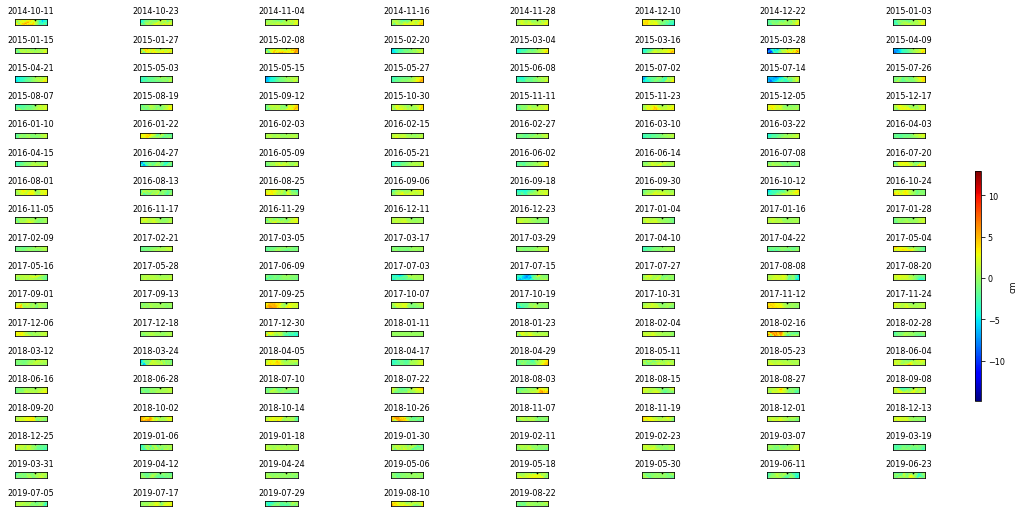

In [4]:
view.main(['timeseries.h5'])

run view.py in MintPy release version v1.2.0-7, release date 2020-01-09
input file is velocity file: /Users/lama/TimeSeries-Track87-master/mintpy/velocity.h5 in float32 format
file size in y/x: (382, 2178)
num of datasets in file velocity.h5: 2
datasets to exclude (0):
[]
datasets to display (2):
['velocity', 'velocityStd']
data   coverage in y/x: (0, 0, 2178, 382)
subset coverage in y/x: (0, 0, 2178, 382)
data   coverage in lat/lon: (35.1965, 28.5803, 37.011599462, 28.26179986)
subset coverage in lat/lon: (35.1965, 28.5803, 37.011599462, 28.26179986)
------------------------------------------------------------------------
colormap: jet
figure title: velocity
figure size : [15.0, 8.0]
dataset number: 2
row     number: 2
column  number: 1
figure  number: 1
read mask from file: maskTempCoh.h5
----------------------------------------
Figure 1 - velocity.png
reading data ...
[==================================================] velocityStd 0s /     0s 
data    range: [-2.572348155081272, 2.

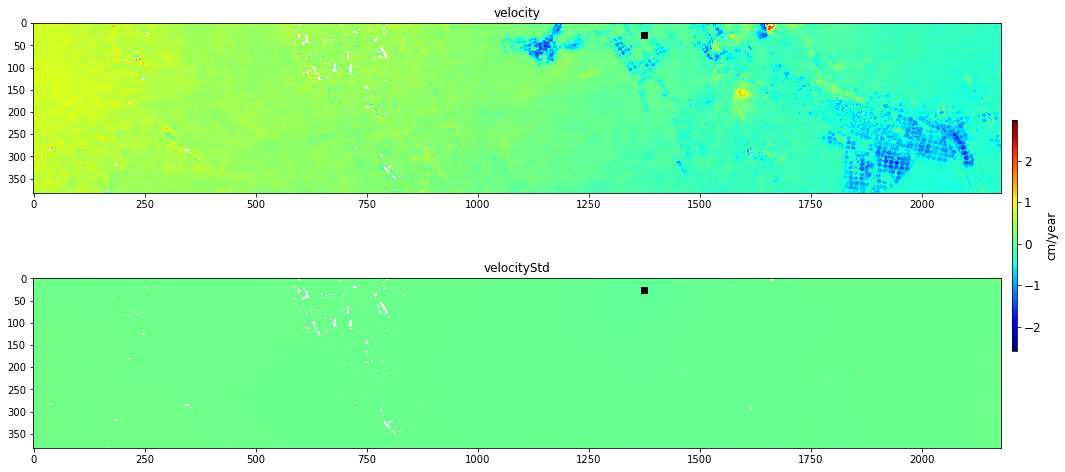

In [10]:
view.main(['velocity.h5'])

run view.py in MintPy release version v1.2.0-7, release date 2020-01-09
input file is velocity file: /Users/lama/TimeSeries-Track87-master/mintpy/velocityERA5.h5 in float32 format
file size in y/x: (382, 2178)
num of datasets in file velocityERA5.h5: 2
datasets to exclude (0):
[]
datasets to display (2):
['velocity', 'velocityStd']
data   coverage in y/x: (0, 0, 2178, 382)
subset coverage in y/x: (0, 0, 2178, 382)
data   coverage in lat/lon: (35.1965, 28.5803, 37.011599462, 28.26179986)
subset coverage in lat/lon: (35.1965, 28.5803, 37.011599462, 28.26179986)
------------------------------------------------------------------------
colormap: jet
figure title: velocityERA5
figure size : [15.0, 8.0]
dataset number: 2
row     number: 2
column  number: 1
figure  number: 1
read mask from file: maskTempCoh.h5
----------------------------------------
Figure 1 - velocityERA5.png
reading data ...
[==================================================] velocityStd 0s /     0s 
data    range: [-0.170

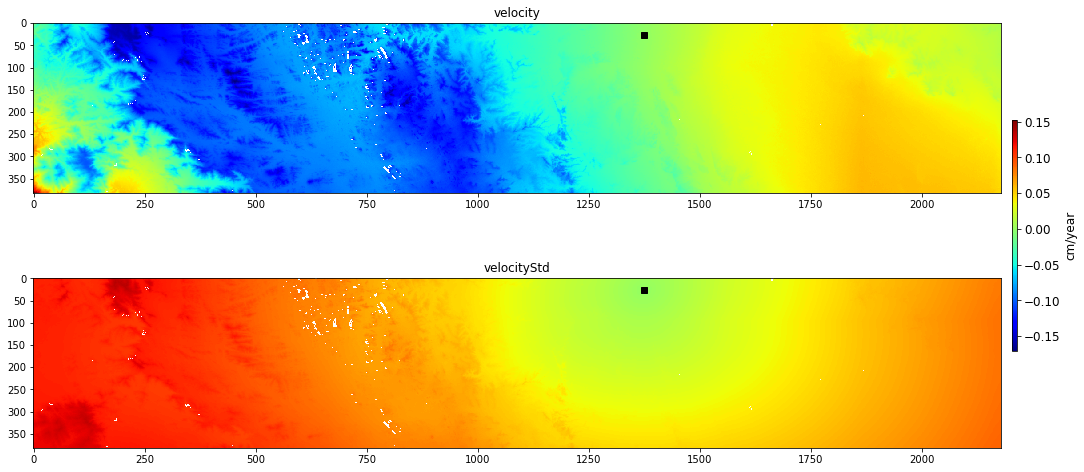

In [11]:
view.main(['velocityERA5.h5'])